In [18]:
import pickle as pkl
import logging
import numpy as np
import gensim
import matplotlib.pyplot as plt

In [ ]:
# Switch for running new experiemnts vs. loading old ones
NEW_EXPERIMETNS = False

In [6]:
# load cleaned corpus
with open('data/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)
with open("data/id2word.pkl", 'rb') as f:
    id2word= pkl.load(f)

In [7]:
#parameters of topic size search
max_topics = 50
min_topics = 2
step_size = 1

In [11]:
# init storage
list_topics = []
list_coherence = []
list_perplexity = []
perplexity = np.full(max_topics, np.nan)
coherence = np.full(max_topics, np.nan)

In [ ]:
# loop through topic sizes

if NEW_EXPERIMETNS:

    for topics in range(min_topics, max_topics, step_size):

        # enable logging
        logging.basicConfig(filename=f'log_files/gensim_{topics}_topics.log',
                        format="%(asctime)s:%(levelname)s:%(message)s",
                        level=logging.INFO)

        # Build LDA model with this number of topics
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=topics, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=1000,
                                               passes=100
    #                                            iterations=5000,
                                               alpha='auto',
                                               eval_every=1,
    #                                            minimum_probability=0,
                                               per_word_topics=True)

        #Compute Perplexity
        perplexity[topics] = lda_model.log_perplexity(corpus)  # a measure of how good the model is. lower the better.

        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        coherence[topics] = coherence_model_lda.get_coherence()

        #save results
        lda_model.save(f"trained_models/trained_lda_model_search_{topics}")
        np.save(f"data/perplexity_{topics}",perplexity)
        np.save(f"data/coherence_{topics}",coherence)

        # screen report
        print(f"Num Topics = {topics}: Perplexity = {perplexity[topics]}, Coherence = {coherence[topics]}")
        list_topics.append(topics)
        list_coherence.append(coherence[topics])

In [25]:
# Load perplexity and coherence scores for plotting
perplexity = np.load(f"data/perplexity_{max_topics-1}.npy")
coherence = np.load(f"data/coherence_{max_topics-1}.npy")
topics = list(range(min_topics, max_topics, step_size))

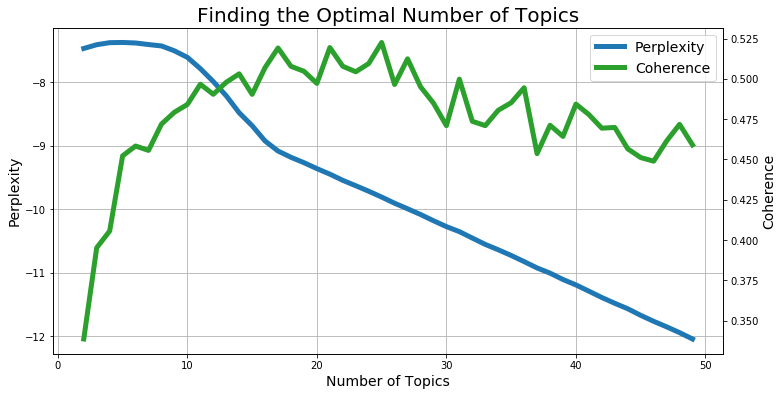

In [39]:
# Plot coherence and perplexity scores

# grab colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# init figure
fig, ax = plt.subplots(figsize=(12,6))

# plot perplexity
pltp = ax.plot(topics, perplexity[topics], label='perplexity',
                linewidth=5)

# plot coherence
ax2 = ax.twinx()  
pltc = ax2.plot(topics, coherence[topics], label='coherence',
                linewidth=5,
                color = colors[2])

# axis labels
ax.set_xlabel('Number of Topics', fontsize=14)
ax.set_ylabel('Perplexity', fontsize=14)
ax2.set_ylabel('Coherence', fontsize=14)
ax.set_title('Finding the Optimal Number of Topics', fontsize=20)

# legend
ax.legend(pltp+pltc, ['Perplexity', 'Coherence'], fontsize=14)

# aesthetics
ax.grid()

# save figure
plt.savefig('figures/perplexity_coherence.png')